In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
lang = 'telugu'

In [111]:
telugu_df = pd.read_csv(f'data/1000_Ramayana_Prashnottari - {lang}.tsv', sep='\t')
telugu_df

,id,question,answer,telugu,correct,answer.1
0,1,श्रीराम की सेना के दो अभियंता वानरों के नाम बत...,नल-नील,శ్రీరాముని సైన్యంలోని రెండు ఇంజనీర్ వానరుల పేర...,శ్రీరాముని సైన్యములోని ఇద్దరు నిర్మాణవేత్తలయిన...,నలనీలులు
1,2,जिस विमान पर बैठकर श्रीराम लक्ष्मण-सीता सहित ल...,पुष्पक,ఎట్టివిమానం ఎక్కి శ్రీరాముడు లక్ష్మణుడు సీతతో ...,శ్రీరాముడు సీతతోను లక్ష్మణునితోను కలిసి లంకనుం...,పుష్పక విమానం
2,3,"लंका के उस प्रसिद्ध वैद्य का क्या नाम था, जिसे...",सुषेण,"లంకలోని ప్రసిద్ధ వైద్యుని పేరు ఏమిటి, లక్రమణుడ...",లక్ష్మణుని మూర్ఛనుండి కోలుకునేట్టు చేసిన లంకలో...,సుషేణుడు
3,4,लक्ष्मण की मूर्च्छा दूर करने हेतु हनुमानजी जो ...,संजीवनी बूटी,లక్ష్మణుడి మూర్చనను పోగొట్టడానికి హనుమంతుడు తీ...,లక్ష్మణుడు మూర్ఛనుండి కోలుకోవుటకు హనుమంతుడు గై...,సంజీవని
4,5,राजा जनक का मूल नाम क्या था ?,सीरध्वज,రాజా జనకుని అసలు పేరు ఏమిటి?,జనక మహారాజుయొక్క వాస్తవిక నామము ఏమిటి?,సీరధ్వజుడు
...,...,...,...,...,...,...
995,996,महिरावण (अद्भुत रामायण के अनुसार) रावण का कौन ...,पुत्र,మహిరావణ (అద్భుత రామాయణం ప్రకారం) రావణుడికి ఎవరు?,మహిరావణ (అద్భుత రామాయణం ప్రకారం) రావణునికి ఎవరు?,కొడుకు
996,997,श्रीराम के अश्वमेध यज्ञ में सीताजों के स्थान प...,स्वर्ण,శ్రీరాముని అశ్వమేధ యాగంలో సీతను స్థానం చేయగా ఆ...,శ్రీరాముని అశ్వమేధ యాగంలో సీతను స్థానంలో ఆమె ర...,బంగారం
997,998,गंधर्वराज शैलूष विभीषण का क्या लगता था ?,श्वसुर,గంధర్వరాజు శైలూష చీల వంశం లో ఎవరు?,గంధర్వరాజు శైలూషుడు విభీషుణికి ఏమవుతాడు?,మావగారు
998,999,भरत-शत्रुघ्न के श्वसुर कौन थे ?,कुशध्वज,భరతశతృఘ్నుల మామయ్యలు ఎవరు?,భరతశతృఘ్నుల మావగారు ఎవరు?,కుశధ్వజుడు


In [112]:
columns_todrop = ['question', 'answer', 'answer.1', 'id']
for col in telugu_df.columns:
    if 'Unnamed' in col:
        columns_todrop.append(col)
telugu_df.drop(columns=columns_todrop, inplace=True)
telugu_df.dropna(inplace=True)

In [113]:
telugu_df['len'] = telugu_df.apply(lambda x: len(x[lang]), axis=1)

In [114]:
telugu_df

,telugu,correct,len
0,శ్రీరాముని సైన్యంలోని రెండు ఇంజనీర్ వానరుల పేర...,శ్రీరాముని సైన్యములోని ఇద్దరు నిర్మాణవేత్తలయిన...,59
1,ఎట్టివిమానం ఎక్కి శ్రీరాముడు లక్ష్మణుడు సీతతో ...,శ్రీరాముడు సీతతోను లక్ష్మణునితోను కలిసి లంకనుం...,96
2,"లంకలోని ప్రసిద్ధ వైద్యుని పేరు ఏమిటి, లక్రమణుడ...",లక్ష్మణుని మూర్ఛనుండి కోలుకునేట్టు చేసిన లంకలో...,124
3,లక్ష్మణుడి మూర్చనను పోగొట్టడానికి హనుమంతుడు తీ...,లక్ష్మణుడు మూర్ఛనుండి కోలుకోవుటకు హనుమంతుడు గై...,73
4,రాజా జనకుని అసలు పేరు ఏమిటి?,జనక మహారాజుయొక్క వాస్తవిక నామము ఏమిటి?,28
...,...,...,...
995,మహిరావణ (అద్భుత రామాయణం ప్రకారం) రావణుడికి ఎవరు?,మహిరావణ (అద్భుత రామాయణం ప్రకారం) రావణునికి ఎవరు?,48
996,శ్రీరాముని అశ్వమేధ యాగంలో సీతను స్థానం చేయగా ఆ...,శ్రీరాముని అశ్వమేధ యాగంలో సీతను స్థానంలో ఆమె ర...,95
997,గంధర్వరాజు శైలూష చీల వంశం లో ఎవరు?,గంధర్వరాజు శైలూషుడు విభీషుణికి ఏమవుతాడు?,34
998,భరతశతృఘ్నుల మామయ్యలు ఎవరు?,భరతశతృఘ్నుల మావగారు ఎవరు?,26


In [115]:
from sacrebleu.metrics import BLEU

In [116]:
bleu = BLEU()

In [117]:
bleu.sentence_score(telugu_df.correct[999], [telugu_df[lang][999]]).score

It is recommended to enable `effective_order` for sentence-level BLEU.


85.5526185871245

In [118]:
telugu_df['bleu'] = telugu_df.apply(lambda x: bleu.sentence_score(x[lang], [x['correct']]).score, axis=1)

It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is 

In [119]:
telugu_df.drop(columns=[lang,'correct'], inplace=True)

In [120]:
telugu_df['len'].min(), telugu_df['len'].max()

(15, 231)

In [121]:
# number of bins
N = 5

/tmp/ipykernel_1188778/3426080805.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = telugu_df.groupby('length_bin')['bleu'].agg(['mean', 'std']).reset_index()


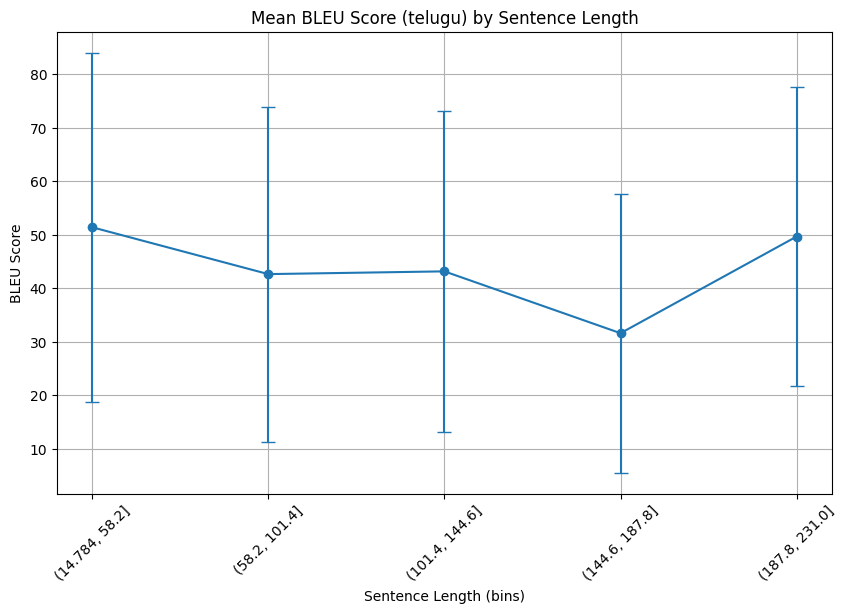

In [122]:
telugu_df['length_bin'] = pd.cut(telugu_df['len'], bins=N)

# Aggregate BLEU scores by bins
agg_df = telugu_df.groupby('length_bin')['bleu'].agg(['mean', 'std']).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(agg_df['length_bin'].astype(str), agg_df['mean'], yerr=agg_df['std'], fmt='o-', capsize=5)
plt.xlabel('Sentence Length (bins)')
plt.ylabel('BLEU Score')
plt.title(f'Mean BLEU Score ({lang}) by Sentence Length')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig(f'results/{lang}.png', bbox_inches='tight')
plt.show()

# Process raw annotated files

In [25]:
src_f = 'data/1000_Ramayana_Prashnottari - sanskrit.tsv'
dst_f = 'data/qa_set/sanskrit.tsv'

In [26]:
df= pd.read_csv(src_f, sep='\t')
df

,id,question,answer,sanskrit,correct,answer.1,MCQ,present in ramayana?
0,1,श्रीराम की सेना के दो अभियंता वानरों के नाम बत...,नल-नील,श्रीरामस्य सेनायाः द्वौ अभियन्तर-वानरौ नामान्य...,श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामन...,नलनीलौ,NaN,NaN
1,2,जिस विमान पर बैठकर श्रीराम लक्ष्मण-सीता सहित ल...,पुष्पक,येन विमानेन श्रीरामः लक्ष्मणसीतेन सहित लङ्कातः...,येन विमानेन श्रीरामः सीतालक्ष्मणाभ्यां सहितः ल...,पुष्पकम्,NaN,NaN
2,3,"लंका के उस प्रसिद्ध वैद्य का क्या नाम था, जिसे...",सुषेण,लङ्कायाः प्रसिद्धः तं वैद्यं लक्ष्मणस्य मूर्च्...,हनुमान् लक्ष्मणस्य मूर्च्छानिवारणाय लङ्कायाः य...,सुषेणः,NaN,NaN
3,4,लक्ष्मण की मूर्च्छा दूर करने हेतु हनुमानजी जो ...,संजीवनी बूटी,लक्ष्मणस्य मूर्च्छा दूराय हनुमान् याम् औषधिं आ...,लक्ष्मणस्य मूर्च्छायाः दूरीकरणाय हनुमान् याम् ...,सञ्जीवनी,NaN,NaN
4,5,राजा जनक का मूल नाम क्या था ?,सीरध्वज,राज्ञः जनकस्य किम् मूलं नाम आसीत्?,राज्ञः जनकस्य किं मूलं नाम आसीत् ?,सीरध्वज,NaN,NaN
...,...,...,...,...,...,...,...,...
995,996,महिरावण (अद्भुत रामायण के अनुसार) रावण का कौन ...,पुत्र,महिरावण (अद्भुत रामायणानुसार) रावणस्य कः भवति?,महिरावणः (अद्भुतरामायणानुसारम्) रावणस्य कः भवति?,पुत्रः,NaN,NaN
996,997,श्रीराम के अश्वमेध यज्ञ में सीताजों के स्थान प...,स्वर्ण,श्रीरामस्य अश्वमेध यज्ञे सीतायाः स्थाने यस्या ...,श्रीरामस्य अश्वमेधयज्ञे सीतायाः स्थाने या प्रत...,स्वर्णेन,NaN,NaN
997,998,गंधर्वराज शैलूष विभीषण का क्या लगता था ?,श्वसुर,गन्धर्वराजः शैलूषः विभीषणस्य कः आसीत्?,गन्धर्वराजः शैलूषः विभीषणस्य कः आसीत्?,श्वशुरः,NaN,NaN
998,999,भरत-शत्रुघ्न के श्वसुर कौन थे ?,कुशध्वज,भरतशत्रुघ्नयोः श्वशुरः कः आसीत्?,भरतशत्रुघ्नयोः श्वशुरः कः आसीत्?,कुशध्वजः,NaN,NaN


In [27]:
df=df[['id','correct','answer.1','MCQ']].rename(columns={'id':'ID','correct':'QUESTION', 'answer.1':'ANSWER','MCQ':'CHOICES'}).fillna('')

In [28]:
df.to_csv(dst_f, sep='\t', index=False)

### Generate relevance data for k=4

In [30]:
src_df = pd.read_csv('results/rag/bm25_4.tsv',sep='\t')
aux_df = pd.read_csv('data/bm25_3_rel.tsv',sep='\t')

In [35]:
aux_df = aux_df[['ID','context_0','rel_0','context_1','rel_1','context_2','rel_2']]
src_df = src_df[['ID','context_0','context_1','context_2','context_3']]

In [42]:
aux_df['context_3'] = src_df['context_3'].copy()

/tmp/ipykernel_2575855/4041207194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_df['context_3'] = src_df['context_3'].copy()


In [46]:
aux_df.to_csv('data/bm25_4_rel.tsv',index=False,sep='\t')

### Combine the answers generated by the LLMs

In [47]:
lang = 'sanskrit'

In [48]:
qa_df = pd.read_csv(f'data/qa_set/{lang}.tsv', sep='\t')

In [64]:
answer_files = [f"results/zero_shot/{lang}_{i}.tsv" for i in range(3)] +\
               [f"results/rag/{emb}_{k+1}.tsv" for k in range(4) for emb in ['bm25','fasttext','glove']]

In [80]:
from tqdm import tqdm
tqdm.pandas()
import string
table = str.maketrans(dict.fromkeys(string.punctuation))  # OR {key: None for key in string.punctuation}

In [81]:
qa_df['LLM_Answers'] = qa_df.apply(lambda x: set(), axis=1)
for answer_file in tqdm(answer_files):
    answer_df = pd.read_csv(answer_file, sep='\t').fillna('')
    methods = [col for col in answer_df.columns if col not in ['ID','QUESTION','ANSWER','CHOICES'] and 'context' not in col]
    qa_df['LLM_Answers_new'] = answer_df.apply(lambda x: [x[m].translate(table) for m in methods], axis=1)
    qa_df['LLM_Answers'] = qa_df.apply(lambda x: x['LLM_Answers'].union(x['LLM_Answers_new']), axis=1)
qa_df.drop(columns=['LLM_Answers_new'], inplace=True)
qa_df.apply(lambda x: x['LLM_Answers'].remove('') if '' in x['LLM_Answers'] else None, axis=1)
qa_df

100%|███████████████████████████████████████████| 15/15 [00:01<00:00, 14.49it/s]


,ID,QUESTION,ANSWER,CHOICES,LLM_Answers
0,1,श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामन...,नलनीलौ,NaN,"{नीलनलौ, नलः सुग्रीवश्च\n\nनलः वानरसेनायाः महा..."
1,2,येन विमानेन श्रीरामः सीतालक्ष्मणाभ्यां सहितः ल...,पुष्पकम्,NaN,"{पुष्पकम्, पुष्पकः विभीषणेन प्रदत्तः आसीत्, प..."
2,3,हनुमान् लक्ष्मणस्य मूर्च्छानिवारणाय लङ्कायाः य...,सुषेणः,NaN,"{सुषेण, संजीवनीम् लक्ष्मणस्य प्राणरक्षणार्थम्,..."
3,4,लक्ष्मणस्य मूर्च्छायाः दूरीकरणाय हनुमान् याम् ...,सञ्जीवनी,NaN,"{सञ्जीवनी, विशल्याकरणीम्, संजीवनी, संजीवनीम् \..."
4,5,राज्ञः जनकस्य किं मूलं नाम आसीत् ?,सीरध्वज,NaN,"{सीता, मैथिलः, सीरध्वजः, मिथिः, निमि, मिथि, नि..."
...,...,...,...,...,...
995,996,महिरावणः (अद्भुतरामायणानुसारम्) रावणस्य कः भवति?,पुत्रः,NaN,"{महिरावणः रावणस्य पुत्रः, अनुजः, महिरावणः अद्भ..."
996,997,श्रीरामस्य अश्वमेधयज्ञे सीतायाः स्थाने या प्रत...,स्वर्णेन,NaN,"{स्वर्णम्, स्वर्णेन, सुवर्ण, काञ्चनम्, सुवर्णे..."
997,998,गन्धर्वराजः शैलूषः विभीषणस्य कः आसीत्?,श्वशुरः,NaN,"{श्वशुरः, गन्धर्वराजः शैलूषः विभीषणस्य मित्रम्..."
998,999,भरतशत्रुघ्नयोः श्वशुरः कः आसीत्?,कुशध्वजः,NaN,"{कुशध्वजः, अश्वपति, कैकेय्याः पिता अशोकदत्तः व..."


In [82]:
qa_df['LLM_Answers'] = qa_df.apply(lambda x: '; '.join(list(x['LLM_Answers'])), axis=1)

In [83]:
qa_df.to_csv(f'data/{lang}_generated_answers.tsv',index=False,sep='\t')